['TargetInterval(s)' 'Network Size' 'Run Index' 'Test' 'Name' 'Succ' 'Fail'
 'Send Rate (tps)' 'Max Latency (s)' 'Min Latency (s)' 'Avg Latency (s)'
 'Throughput (tps)' 'Stale Block Rate' 'Num Blocks' 'Num Txns'
 'Round Duration' 'My Throughput (tps)' 'Avg Interval' 'Min Interval'
 'Max Interval' 'PercentDiff on TPS']
netsizes: [1, 2, 4, 8], repeats: [0, 1], intervals: [3, 5, 10, 20, 30, 40, 50, 60, 80, 100], number_of_colors: 10


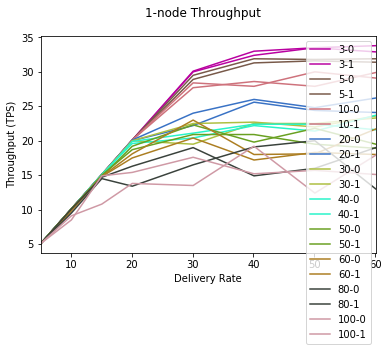

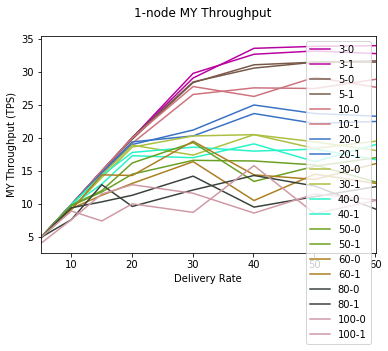

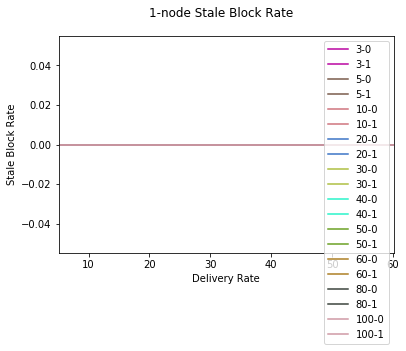

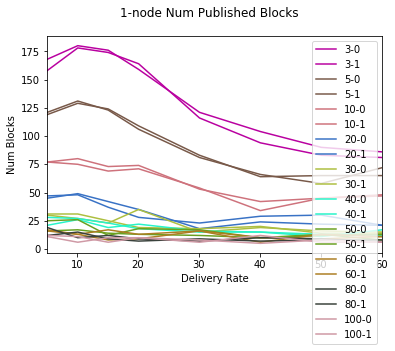

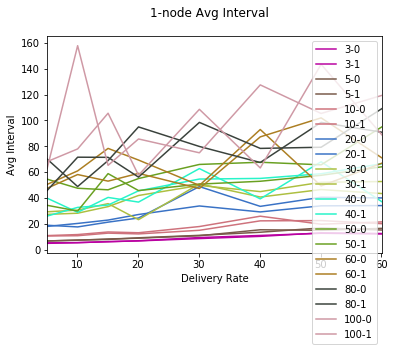

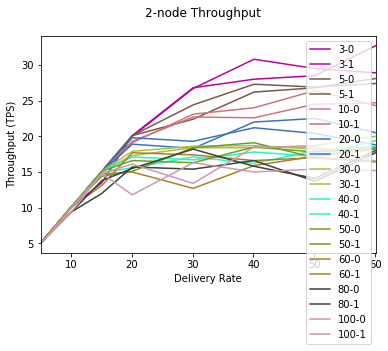

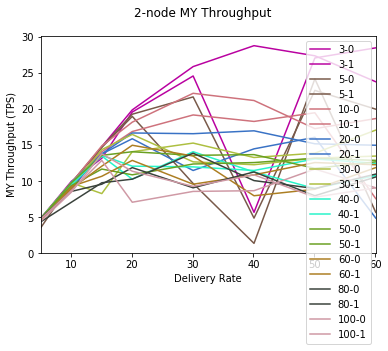

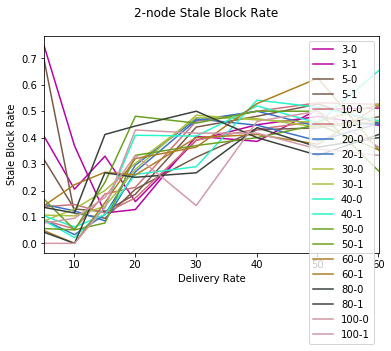

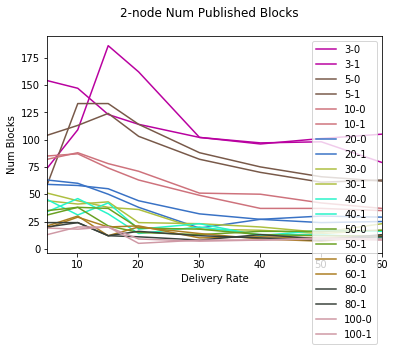

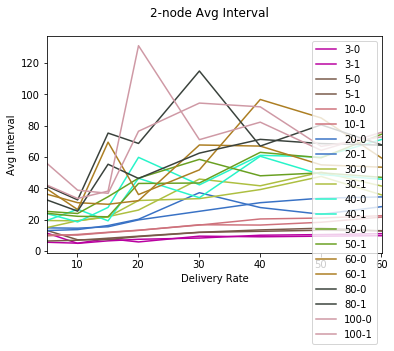

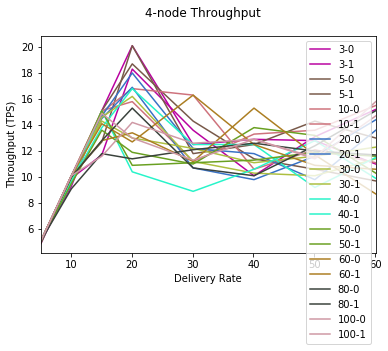

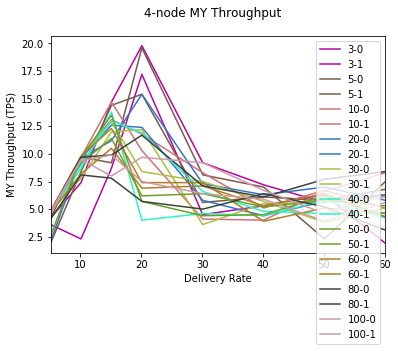

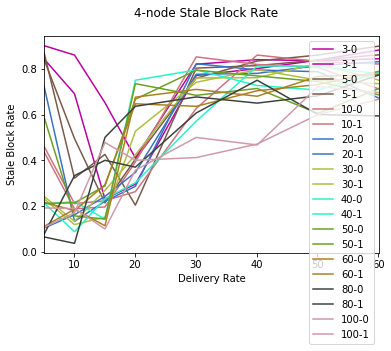

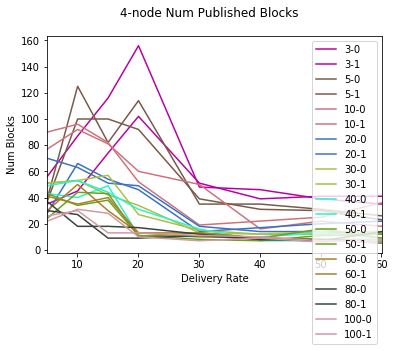

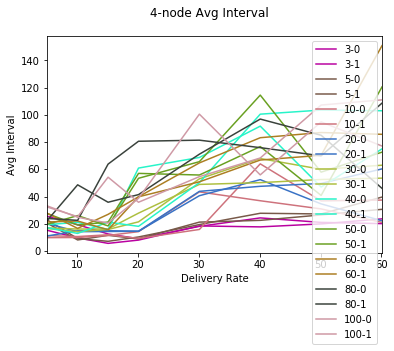

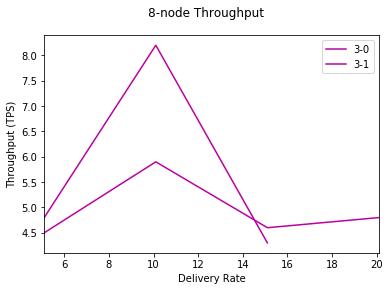

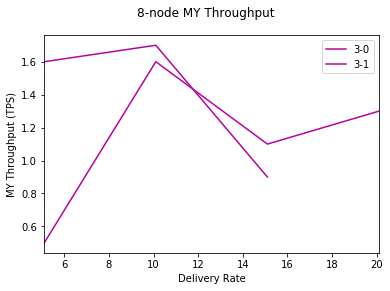

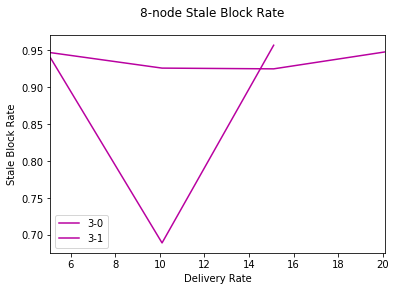

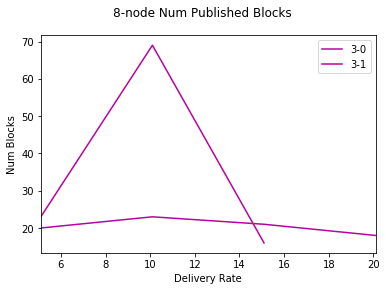

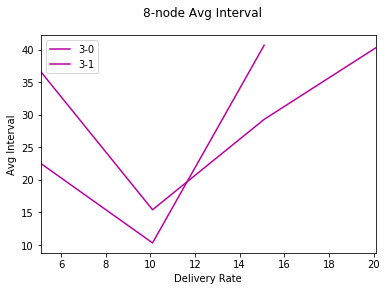

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os

#DATA = "./04-17-19-size4-varyblocktime-3-50-rep3.csv"
#DATA = "./04-18-19-size4-linear-30tps-varyblocktime-rep3.csv"
DATA = "./big_perf.csv"
df = pd.read_csv(DATA)
print(df.columns.values)
#print(df.head)

netsizes = list(df["Network Size"].unique())
repeats = list(df["Run Index"].unique())
intervals = list(df["TargetInterval(s)"].unique())
number_of_colors = len(intervals)

print("netsizes: {}, repeats: {}, intervals: {}, number_of_colors: {}".format(netsizes, repeats, intervals, number_of_colors))
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

FIGS = {}

for size in netsizes:
    figlist = []
    sizedf = df[df['Network Size'] == size]
    # plot Throughput
    fig1, ax1 = plt.subplots()
    fig1.suptitle("{}-node Throughput".format(size))
    for interval in intervals:
        color = colors[intervals.index(interval)]
        interdf = sizedf[sizedf["TargetInterval(s)"] == interval]
        for run in repeats:
            rundf = interdf[interdf['Run Index'] == run]
            try:
                rundf.plot(x="Send Rate (tps)", y="Throughput (tps)", ax=ax1, label=str(interval) + "-" +str(run), color=color)
            except TypeError as e:
                #print(e, "config: size {}, interval {}, run {}".format(size, interval, subset))
                pass
    ax1.set(xlabel="Delivery Rate", ylabel="Throughput (TPS)")
    
    fig2, ax2 = plt.subplots()
    fig2.suptitle("{}-node MY Throughput".format(size))
    for interval in intervals:
        color = colors[intervals.index(interval)]
        interdf = sizedf[sizedf["TargetInterval(s)"] == interval]
        for run in repeats:
            rundf = interdf[interdf['Run Index'] == run]
            try:
                rundf.plot(x="Send Rate (tps)", y="My Throughput (tps)", ax=ax2, label=str(interval) + "-" +str(run), color=color)
            except TypeError as e:
                #print(e, "config: size {}, interval {}, run {}".format(size, interval, subset))
                pass
    ax2.set(xlabel="Delivery Rate", ylabel="MY Throughput (TPS)")
    
    fig3, ax3 = plt.subplots()
    fig3.suptitle("{}-node Stale Block Rate".format(size))
    for interval in intervals:
        color = colors[intervals.index(interval)]
        interdf = sizedf[sizedf["TargetInterval(s)"] == interval]
        for run in repeats:
            rundf = interdf[interdf['Run Index'] == run]
            try:
                rundf.plot(x="Send Rate (tps)", y="Stale Block Rate", ax=ax3, label=str(interval) + "-" +str(run), color=color)
            except TypeError as e:
                #print(e, "config: size {}, interval {}, run {}".format(size, interval, subset))
                pass
    ax3.set(xlabel="Delivery Rate", ylabel="Stale Block Rate")

    fig4, ax4 = plt.subplots()
    fig4.suptitle("{}-node Num Published Blocks".format(size))
    for interval in intervals:
        color = colors[intervals.index(interval)]
        interdf = sizedf[sizedf["TargetInterval(s)"] == interval]
        for run in repeats:
            rundf = interdf[interdf['Run Index'] == run]
            try:
                rundf.plot(x="Send Rate (tps)", y="Num Blocks", ax=ax4, label=str(interval) + "-" +str(run), color=color)
            except TypeError as e:
                #print(e, "config: size {}, interval {}, run {}".format(size, interval, subset))
                pass
    ax4.set(xlabel="Delivery Rate", ylabel="Num Blocks")
    
    fig5, ax5 = plt.subplots()
    fig5.suptitle("{}-node Avg Interval".format(size))
    for interval in intervals:
        color = colors[intervals.index(interval)]
        interdf = sizedf[sizedf["TargetInterval(s)"] == interval]
        for run in repeats:
            rundf = interdf[interdf['Run Index'] == run]
            try:
                rundf.plot(x="Send Rate (tps)", y="Avg Interval", ax=ax5, label=str(interval) + "-" +str(run), color=color)
            except TypeError as e:
                #print(e, "config: size {}, interval {}, run {}".format(size, interval, subset))
                pass
    ax5.set(xlabel="Delivery Rate", ylabel="Avg Interval")

    """
    fig1.savefig("/home/amie/Desktop/throughput.pdf")
    fig2.savefig("/home/amie/Desktop/MYthroughput.pdf")
    fig3.savefig("/home/amie/Desktop/stale.pdf")
    fig4.savefig("/home/amie/Desktop/numblocks.pdf")
    fig5.savefig("/home/amie/Desktop/avginterval.pdf")
    """
    
plt.show()
